<a href="https://colab.research.google.com/github/hadywalied/numerical_mahdy/blob/master/neumerical_Mahdy_model_9-9-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installing dependencies

In [4]:
!pip install torch wandb numpy pandas matplotlib
#! git clone https://github.com/hadywalied/numerical_mahdy

import torch
torch.version.__version__

'2.0.1+cu118'

# Getting the  Data and preprocessing

In [5]:
import pandas as pd

input_file = 'output_results.csv'
csv_data = pd.read_csv(input_file)
csv_data.head()

,Unnamed: 0,H,B,q,R_int,gamma,Su,sf_lower,sf_upper
0,0,8,4,10,1.0,16,100,4.651,4.861
1,1,8,4,10,1.0,16,75,3.489,3.638
2,2,8,4,10,1.0,16,50,2.326,2.423
3,3,8,4,10,1.0,16,25,1.163,1.215
4,4,8,4,10,1.0,14,100,5.234,5.510


In [6]:
from torch.utils.data import Dataset
import numpy as np
import math

class MyDataset(Dataset):

  def __init__(self,file_name, train_test_ratio = 0.9, test=False):
    _df=pd.read_csv(file_name)

    if test:
      data_len = math.floor((1-train_test_ratio) * len(_df.iloc[:,0]))
    else:
      data_len = math.floor(train_test_ratio * len(_df.iloc[:,0]))

    x=_df.iloc[:data_len,1:-2].values
    y=_df.iloc[:data_len,-2:].values

    self.x_data=torch.tensor(x,dtype=torch.float32)
    self.y_data=torch.tensor(y,dtype=torch.float32)

  def __len__(self):
    return np.shape(self.y_data)[0]

  def __getitem__(self,idx):
    return self.x_data[idx],self.y_data[idx]


In [7]:
train_dataset = MyDataset(input_file)
test_dataset = MyDataset(input_file, test=True)

# Making The Model Archs

In [8]:
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(1) # Reproducible

In [9]:
EPOCH = 100

BATCH_SIZE = 37

LR = 0.001


In [10]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset,batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(test_dataset,batch_size = BATCH_SIZE, shuffle = False)

In [11]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")


Feature batch shape: torch.Size([37, 6])
Labels batch shape: torch.Size([37, 2])


In [12]:
# class MultipleLinearRegression(torch.nn.Module):
#     # Constructor
#     def __init__(self, input_dim=6, output_dim=2):
#         super(MultipleLinearRegression, self).__init__()
#         self.linear1 = torch.nn.Linear(input_dim, int(input_dim /2))
#         self.linear2 = torch.nn.Linear(int(input_dim /2), output_dim)
#     # Prediction
#     def forward(self, x):
#         y_pred = self.linear1(x)
#         return y_pred

import torch as T
import torch.nn

class MultipleLinearRegression(T.nn.Module):
  def __init__(self, input = 6, output=2):
    super(MultipleLinearRegression, self).__init__()
    self.hid1 = T.nn.Linear(input, 6)  # 8-(10-10)-1
    self.hid2 = T.nn.Linear(6, 6)
    self.oupt = T.nn.Linear(6, output)

    T.nn.init.xavier_uniform_(self.hid1.weight)
    T.nn.init.zeros_(self.hid1.bias)
    T.nn.init.xavier_uniform_(self.hid2.weight)
    T.nn.init.zeros_(self.hid2.bias)
    T.nn.init.xavier_uniform_(self.oupt.weight)
    T.nn.init.zeros_(self.oupt.bias)

  def forward(self, x):
    z = T.sigmoid(self.hid1(x))
    z = T.sigmoid(self.hid2(z))
    z = self.oupt(z)  # no activation
    return z

# input_layer = []
# input_layer.append(nn.Linear(6,10))
# input_layer.append(nn.Sigmoid())
# input_layer.append(nn.Linear(10,10))
# input_layer.append(nn.Sigmoid())
# input_layer.append(nn.Linear(10,10))
# input_layer.append(nn.Sigmoid())
# input_layer.append(nn.Linear(10,6))
# input_layer.append(nn.Sigmoid())
# input_layer.append(nn.Linear(6,4))
# input_layer.append(nn.Sigmoid())
# input_layer.append(nn.Linear(4,4))
# input_layer.append(nn.Sigmoid())
# input_layer.append(nn.Linear(4, 2))
# MLR_model = nn.Sequential(*input_layer)



In [13]:
MLR_model = MultipleLinearRegression(6,2)
print("The parameters: ", list(MLR_model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6476, -0.1308,  0.3987,  0.3062, -0.4571, -0.6013],
        [ 0.6787,  0.0369,  0.4847,  0.1465,  0.2274,  0.5282],
        [ 0.6705, -0.4692,  0.0884,  0.5277,  0.5123,  0.4393],
        [-0.5117, -0.5092, -0.4276,  0.0888,  0.7047, -0.4467],
        [ 0.3768, -0.3914, -0.6648, -0.1503,  0.4074,  0.6565],
        [-0.4391,  0.1535,  0.6101,  0.4686,  0.4407,  0.5025]],
       requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0.], requires_grad=True), Parameter containing:
tensor([[ 0.4473,  0.1826, -0.4835, -0.5938, -0.3240, -0.0823],
        [-0.4334,  0.2587,  0.2188, -0.1601,  0.2718,  0.2285],
        [ 0.4317,  0.4762, -0.2395,  0.6909, -0.0817, -0.0243],
        [-0.6674, -0.4551, -0.4131, -0.3024,  0.5027, -0.2311],
        [-0.5284,  0.2721,  0.2264,  0.4580, -0.3659,  0.1533],
        [-0.2574, -0.1589, -0.5635, -0.3223, -0.2166,  0.3024]],
       requires_grad=True), Parameter containing:
tensor([0., 0.

In [14]:
# defining the model optimizer
optimizer = torch.optim.AdamW(MLR_model.parameters(), lr=LR)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

# defining the loss criterion
criterion = torch.nn.MSELoss()


In [15]:
# Check the model gives data (NO TRAINING YET)
x = torch.tensor([8,	6,	10,	1.0,	16,	100])
y_pred = MLR_model(x)
print(y_pred)

tensor([ 1.3146, -0.3314], grad_fn=<AddBackward0>)


# Training

In [16]:
t_losses = []
for epoch in range(EPOCH):
    for i, (inputs, targets) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = MLR_model(inputs)
        loss = criterion(outputs, targets)
        t_losses.append(loss.item())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        # scheduler.step()

        # Print training statistics
        if (i + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{EPOCH}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/100], Step [10/84], Loss: 11.5250
Epoch [1/100], Step [20/84], Loss: 10.9950
Epoch [1/100], Step [30/84], Loss: 13.7014
Epoch [1/100], Step [40/84], Loss: 26.2995
Epoch [1/100], Step [50/84], Loss: 19.7635
Epoch [1/100], Step [60/84], Loss: 32.7123
Epoch [1/100], Step [70/84], Loss: 41.8939
Epoch [1/100], Step [80/84], Loss: 83.2698
Epoch [2/100], Step [10/84], Loss: 8.6651
Epoch [2/100], Step [20/84], Loss: 8.3317
Epoch [2/100], Step [30/84], Loss: 10.7514
Epoch [2/100], Step [40/84], Loss: 22.2709
Epoch [2/100], Step [50/84], Loss: 16.4330
Epoch [2/100], Step [60/84], Loss: 28.5188
Epoch [2/100], Step [70/84], Loss: 37.1767
Epoch [2/100], Step [80/84], Loss: 76.6456
Epoch [3/100], Step [10/84], Loss: 6.8574
Epoch [3/100], Step [20/84], Loss: 6.6184
Epoch [3/100], Step [30/84], Loss: 8.7068
Epoch [3/100], Step [40/84], Loss: 19.1708
Epoch [3/100], Step [50/84], Loss: 13.8096
Epoch [3/100], Step [60/84], Loss: 24.9637
Epoch [3/100], Step [70/84], Loss: 32.9848
Epoch [3/100], S

In [17]:
# # Train the model
# t_losses = []
# for epoch in range(EPOCH):
#     for x,y in train_loader:
#         y_pred = MLR_model(x)
#         loss = criterion(y_pred, y)
#         t_losses.append(loss.item())
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#     print(f"epoch = {epoch}, loss = {loss}")
# print("Done training!")


# Testing

In [18]:
# Evaluate the model on the test data
with torch.no_grad():
    total_loss = 0
    for inputs, targets in test_loader:
        outputs = MLR_model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item()
    mean_loss = total_loss / len(test_loader)
    print(f'Test Loss: {mean_loss:.4f}')

Test Loss: 0.5377


In [19]:
# Test the model
# losses = []
# with torch.no_grad():
#   for epoch in range(EPOCH):
#     for x,y in test_loader:
#         y_pred = MLR_model(x)
#         loss = criterion(y_pred, y)
#         losses.append(loss.item())
#         #optimizer.zero_grad()
#         #loss.backward()
#         #optimizer.step()
#     print(f"epoch = {epoch}, loss = {loss}")
# print("Done testing!")


# Plots

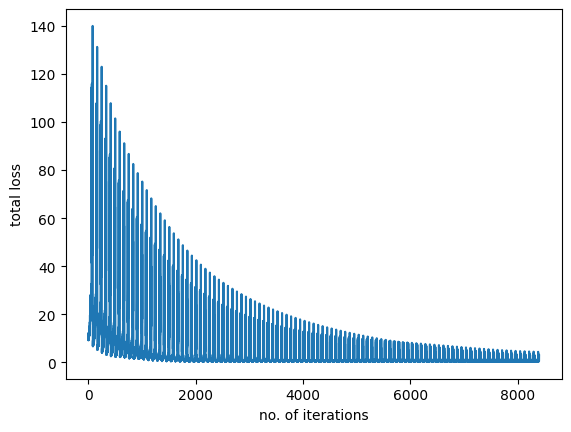

In [20]:
# Plot the training losses
plt.plot(t_losses)
plt.xlabel("no. of iterations")
plt.ylabel("total loss")
plt.show()

# CNN Model

In [21]:
class CNNRegression(nn.Module):
    def __init__(self):
        super(CNNRegression, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=32 * 7 * 7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=2)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        return x


In [22]:
CNN_model = CNNRegression()

# CNN Training

In [23]:
train_loader = DataLoader(train_dataset,batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(test_dataset,batch_size = BATCH_SIZE, shuffle = False)

In [24]:
# t_losses = []
# for epoch in range(EPOCH):
#     for i, (inputs, targets) in enumerate(train_loader):
#         # Zero the gradients
#         optimizer.zero_grad()

#         # Forward pass
#         outputs = CNN_model(inputs)
#         loss = criterion(outputs, targets)
#         t_losses.append(loss.item())

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()

#         # Print training statistics
#         if (i + 1) % 10 == 0:
#             print(f'Epoch [{epoch + 1}/{EPOCH}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}')


In [25]:
# # Evaluate the model on the test data
# with torch.no_grad():
#     total_loss = 0
#     for inputs, targets in test_loader:
#         outputs = MLR_model(inputs)
#         loss = criterion(outputs, targets)
#         total_loss += loss.item()
#     mean_loss = total_loss / len(test_loader)
#     print(f'Test Loss: {mean_loss:.4f}')

# Prediction on real data

In [26]:
cases = []
case1 = [2.4, 4.8, 15, 1, 19, 12]
case2 = [5, 5, 0, 1, 19, 16]
case3 = [11.3, 16, 0, 1, 19, 35]
cases.append(case1)
cases.append(case2)
cases.append(case3)

cases_op = []
case1_op = [1.03, 1.11, 0.97, 1.05]
case2_op = [1.02, 1.26, 1.03, 1.1]
case3_op = [1, 1.11, 0.95, 1]
cases_op.append(case1_op)
cases_op.append(case2_op)
cases_op.append(case3_op)

print(cases_op)

for i, each_case in enumerate(cases):
  y_pred_MLR = MLR_model(torch.Tensor(each_case))
  val = float(np.average(y_pred_MLR.detach()))
  # y_pred_CNN = CNN_model(x)
  cases_op[i].append(val)
  # print(y_pred_CNN)

print(cases_op)



[[1.03, 1.11, 0.97, 1.05], [1.02, 1.26, 1.03, 1.1], [1, 1.11, 0.95, 1]]
[[1.03, 1.11, 0.97, 1.05, 2.8315346240997314], [1.02, 1.26, 1.03, 1.1, 2.1614599227905273], [1, 1.11, 0.95, 1, 2.137063503265381]]


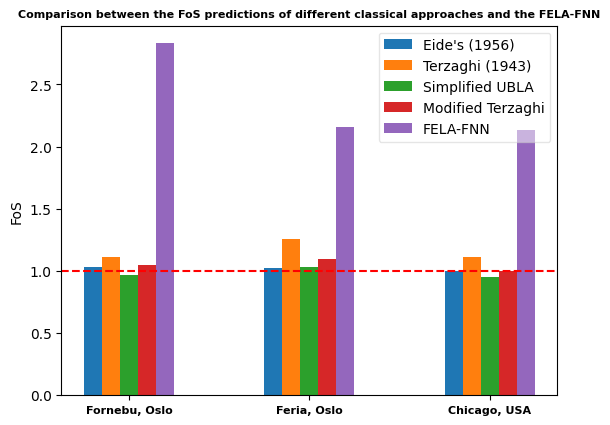

In [59]:
import numpy as np
import matplotlib.pyplot as plt

species = ('Fornebu, Oslo', 'Feria, Oslo', 'Chicago, USA')

means = {
    "Eide's (1956)": [],
    "Terzaghi (1943)": [],
    "Simplified UBLA": [],
    "Modified Terzaghi": [],
    "FELA-FNN": []
}

# Assuming you have 'cases_op' defined elsewhere

for i, items in enumerate(means.items()):
    means[items[0]] += ([x[i] for x in cases_op])

x = np.arange(len(species))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('FoS')

# Adjust the x-axis tick positions and labels
new_x = x + width * (len(means) - 1) / 2
ax.set_xticks(new_x)
ax.set_xticklabels(species, rotation=0, ha='center', fontsize=8, fontweight='bold')  # Adjust 'ha' to 'center'

# Adjust the legend location to 'upper right' and specify the number of columns (ncols)
legend = ax.legend(loc='upper right', ncols=1)

# Set the transparency of the legend background to 50%
legend.get_frame().set_alpha(0.5)

ax.axhline(y=1, color='red', linestyle='--', label='Y = 1')

# Set the chart title with a customizable font size
chart_title = "Comparison between the FoS predictions of different classical approaches and the FELA-FNN"
title_fontsize = 8  # You can adjust the font size as needed
ax.set_title(chart_title, fontsize=title_fontsize, fontweight='bold')  # Make the title bold

# Increase figure quality by adjusting the DPI
plt.savefig('your_figure_600_2.png', dpi=600)  # You can adjust the filename and DPI as needed

plt.show()
